In [5]:
import awkward as ak
import hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import PackedSelection
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt

In [6]:
filename = "/home/prayag/Coffea/data/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root"
events = NanoEventsFactory.from_root(
    filename,
    schemaclass=NanoAODSchema.v7
).events()

In [7]:
sel = PackedSelection()
sel.add("anyloose", ak.any(events.Electron.cutBased == 2, axis=1 )) 
sel.add("veto", ak.any(events.Electron.cutBased == 1, axis=1 ))

In [8]:
comphist = hist.Hist.new.StrCat(["anyloose","veto"], name="mode").Regular(25,0,100, name="pt").Double()

In [9]:
loose = events[sel.all("anyloose")]
veto = events[sel.all("veto")]
comphist.fill(mode="anyloose", pt = ak.flatten(loose.Electron.pt ))
comphist.fill(mode="veto", pt = ak.flatten(veto.Electron.pt ))

Hist(
  StrCategory(['anyloose', 'veto'], name='mode'),
  Regular(25, 0, 100, name='pt'),
  storage=Double()) # Sum: 56359.0 (61600.0 with flow)

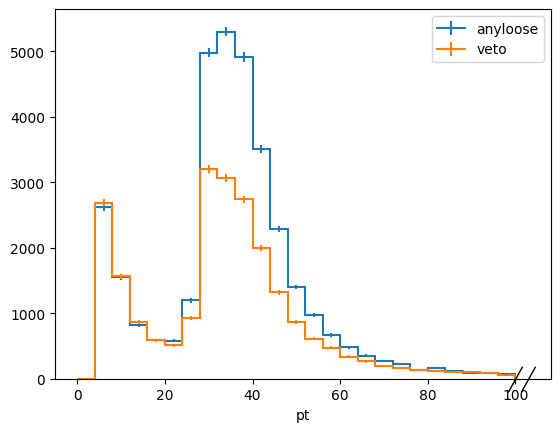

In [10]:
fig, ax = plt.subplots()
hep.histplot(
    [comphist["anyloose",:],comphist["veto",:]],
    label=["anyloose","veto"],
    ax=ax
)
ax.legend()

In [11]:
print("Total events: ", len(events))
print("Events which have at least one loose electron (x) = ", len(loose))
print("Events where electrons are vetoed out (y) = ", len(veto))
print("x+y = ", len(loose)+len(veto))

Total events:  297347
Events which have at least one loose electron (x) =  26860
Events where electrons are vetoed out (y) =  18483
x+y =  45343


In [15]:
from coffea import util
from monoHbbtools.Utilities import get_timestamp

In [16]:
Output = util.load("BackgroundDijets.coffea")

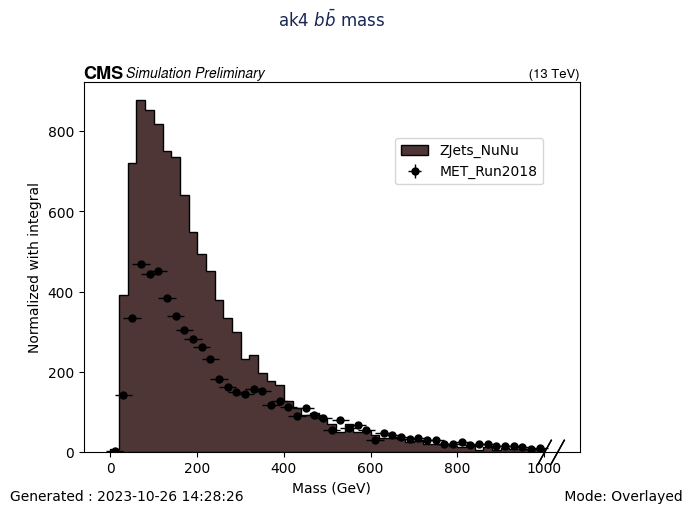

In [34]:

Data_hist = Output["MET_Run2018"]["Histograms"]["DiJet"]
Zjets_hist = Output["ZJets_NuNu"]["Histograms"]["DiJet"]

fig, ax = plt.subplots()
hep.histplot(
    Zjets_hist,
    histtype="fill",
    color="#4E3636",
    #marker=[],
    label="ZJets_NuNu",
    edgecolor="black",
    lw=1,
    ax=ax
    )
hep.histplot(
    Data_hist ,
    histtype='errorbar',
    yerr=0,
    xerr=20,
    color="black",
    marker='o',
    markersize=5,
    linestyle="None",
    label="MET_Run2018",
    #edgecolor="black",
    lw=0,
    ax=ax
    )
# Measured data
# ax.errorbar(
#    center,
#    hist,
#    xerr=xerrs,
#    yerr=yerrs,
#    linestyle="None",
#   color="black",
#    marker="o",
#    label="Data"
# )

hep.cms.label("Preliminary", data= False)
ax.set_ylabel("Normalized with integral")
ax.set_xlabel("Mass (GeV)")
ax.set_title(r"ak4 $b \bar{b}$ mass",pad=40, color="#192655")
fig.text(0.01,0.01,"Generated : "+get_timestamp(), fontsize = "10")
fig.text(0.87,0.01," Mode: Overlayed", fontsize = "10")
fig.legend(loc= (0.57,0.64))